<center>

# ФБ-24 Шевченко Вікторія
## Лабораторна робота №4
## Структури для роботи з великими обсягами даних в Python
## Другий рівень

</center>

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
import seaborn as sns

<h3>Завантаження датасету</h3>

In [34]:
if os.path.exists('cleaned_heart_disease.csv'):
    os.remove('cleaned_heart_disease.csv')
    print("Попередній файл 'cleaned_heart_disease.csv' був видалений.")


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(url, header=None, names=column_names)


df.to_csv('cleaned_heart_disease.csv', index=False)
print("Очищений датасет збережено у файлі 'cleaned_heart_disease.csv'.")
display(df.head())

Попередній файл 'cleaned_heart_disease.csv' був видалений.
Очищений датасет збережено у файлі 'cleaned_heart_disease.csv'.


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<h3> Data cleaning </h3>

In [35]:
#df.replace("?", pd.NA, inplace=True)

df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

g_map = {1: 'male', 0: 'female'}
df['gender'] = df['gender'].replace(g_map)

display(df)
df.info()
print(df.isnull().sum())


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,male,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,male,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,female,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   gender    303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 33.3+ KB
age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int6

In [36]:
npdata = df.values

print(npdata[-5:])


[[45.0 'male' 1.0 110.0 264.0 0.0 0.0 132.0 0.0 1.2 2.0 0.0 7.0 1]
 [68.0 'male' 4.0 144.0 193.0 1.0 0.0 141.0 0.0 3.4 2.0 2.0 7.0 2]
 [57.0 'male' 4.0 130.0 131.0 0.0 0.0 115.0 1.0 1.2 2.0 1.0 7.0 3]
 [57.0 'female' 2.0 130.0 236.0 0.0 2.0 174.0 0.0 0.0 2.0 1.0 3.0 1]
 [38.0 'male' 3.0 138.0 175.0 0.0 0.0 173.0 0.0 0.0 1.0 nan 3.0 0]]


<h3> <b>1 спосіб</b> усунення проблеми пропущених значень - видалення рядків </h3>

In [22]:

df.dropna(inplace=True)

print(df.isnull().sum())


age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


<h3><b>2 спосіб </b>- заміна на найбільш вживані значення у стовпчику</h3>

In [37]:

df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
# Перевірка, чи були замінені пропущені значення
#print(df.isnull().sum())
df.info()
display(df.tail())
#print(df.iloc[89])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   gender    303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 33.3+ KB


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,male,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,male,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,male,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,female,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,male,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [39]:
# Заміна пропущених значень у стовпцях 'ca' та 'thal' 
ca_median = np.nanmedian(npdata[:, 11].astype(float)) 
thal_median = np.nanmedian(npdata[:, 12].astype(float))  

ca_column = npdata[:, 11]  
thal_column = npdata[:, 12] 

ca_column[np.isnan(ca_column.astype(float))] = ca_median
thal_column[np.isnan(thal_column.astype(float))] = thal_median

# Оновлення стовпців у масиві
npdata[:, 11] = ca_column  
npdata[:, 12] = thal_column  

# Перевірка, чи були замінені пропущені значення
print('Кількість нулів у стовпцях:')
print(np.isnan(npdata[:, 11].astype(float)).sum())
print(np.isnan(npdata[:, 12].astype(float)).sum())

print(npdata[-5:])


Кількість нулів у стовпцях:
0
0
[[45.0 'male' 1.0 110.0 264.0 0.0 0.0 132.0 0.0 1.2 2.0 0.0 7.0 1]
 [68.0 'male' 4.0 144.0 193.0 1.0 0.0 141.0 0.0 3.4 2.0 2.0 7.0 2]
 [57.0 'male' 4.0 130.0 131.0 0.0 0.0 115.0 1.0 1.2 2.0 1.0 7.0 3]
 [57.0 'female' 2.0 130.0 236.0 0.0 2.0 174.0 0.0 0.0 2.0 1.0 3.0 1]
 [38.0 'male' 3.0 138.0 175.0 0.0 0.0 173.0 0.0 0.0 1.0 0.0 3.0 0]]


In [40]:
file_path = 'result_df.csv'

if os.path.exists(file_path):
    os.remove(file_path)

df.to_csv(file_path, index=False)
#npdata = np.genfromtxt(file_path, delimiter=',', dtype=str, skip_header=1)
#print(npdata)

<h3>2. Нормалізація та стандартизація віку</h3>

In [35]:
def normalize_and_standardize_age(df):
    min_age = df['age'].min()
    max_age = df['age'].max()
    mean_age = df['age'].mean()
    std_age = df['age'].std()
    
    df['norm_age'] = (df['age'] - min_age) / (max_age - min_age)
    df['stand_age'] = (df['age'] - mean_age) / std_age
    
    return df

# Виклик функції для нормалізації та стандартизації віку
df = normalize_and_standardize_age(df)
print(df[['age', 'norm_age', 'stand_age']].head())


    age  norm_age  stand_age
0  63.0  0.708333   0.947160
1  67.0  0.791667   1.389703
2  67.0  0.791667   1.389703
3  37.0  0.166667  -1.929372
4  41.0  0.250000  -1.486829


<h3>3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.</h3>

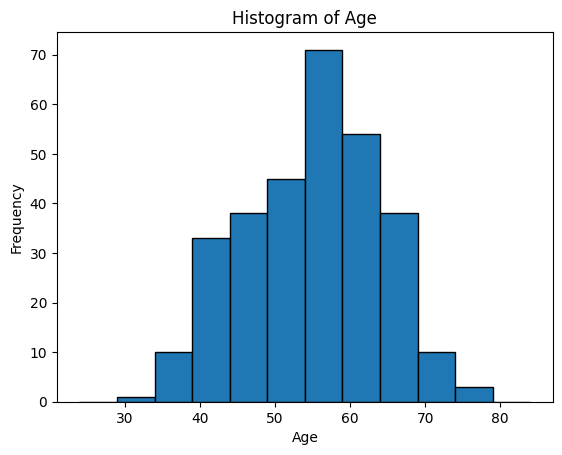

In [41]:

bins = [i for i in range(24, 85, 5)]

age_range = (df['age'].min(), df['age'].max())

plt.hist(df['age'], bins, range=age_range, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<h3> 4. Збудувати графік залежності одного integer/real атрибута від іншого. </h3>

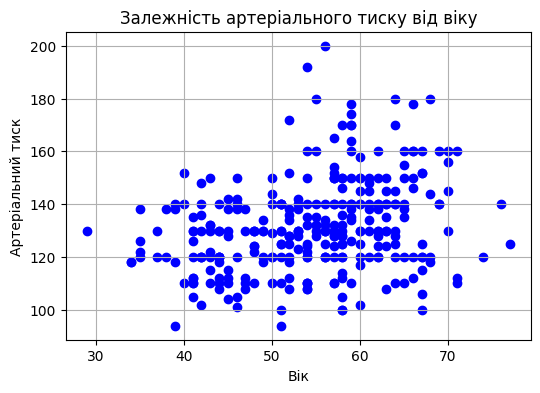

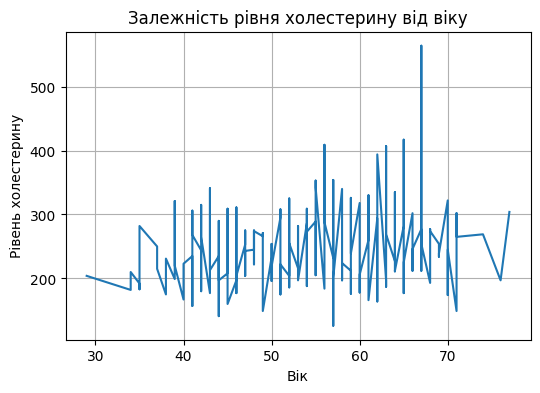

In [42]:
df_sorted = df.sort_values(by='age')

x = df_sorted['age']
y1 = df_sorted['trestbps']
y2 = df_sorted['chol']

#scatter plot для артеріального тиску (trestbps)
plt.figure(figsize=(6, 4))
plt.scatter(x, y1, color='blue')
plt.title('Залежність артеріального тиску від віку')
plt.xlabel('Вік')
plt.ylabel('Артеріальний тиск')
plt.grid(True)
plt.show()

#лінійний графік для рівня холестерину (chol)
plt.figure(figsize=(6, 4))
plt.plot(x, y2)
plt.title('Залежність рівня холестерину від віку')
plt.xlabel('Вік')
plt.ylabel('Рівень холестерину')
plt.grid(True)
plt.show()


<h3> 5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів. </h3>

In [43]:
x = df['age']
y = df['trestbps']

pearson_corr = stats.pearsonr(x, y).statistic
spearman_corr = stats.spearmanr(x, y).statistic

print("Коефіцієнт кореляції Пірсона:", pearson_corr)
print("Коефіцієнт кореляції Спірмена:", spearman_corr)


Коефіцієнт кореляції Пірсона: 0.2849459193136903
Коефіцієнт кореляції Спірмена: 0.29218326471011025


<h3> 6. Провести <b>One Hot Encoding </b>категоріального string атрибуту. </h3>

In [46]:

def OneHotEncoding(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    #Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)

    # Apply one-hot encoding to the categorical columns
    one_hot_encoded = encoder.fit_transform(df[categorical_columns])

    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    df_encoded = pd.concat([df, one_hot_df], axis=1)

    #df_encoded = df_encoded.drop(categorical_columns, axis=1)
    return df_encoded.head()

t_map = {3: 'normal', 6: 'fixed defect', 7: 'reversable defect'}
df_new = df.copy()  
df_new['thal'] = df_new['thal'].replace(t_map)

# Display the resulting dataframe
print("Encoded Employee data:")
display(OneHotEncoding(df_new))

Encoded Employee data:


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender_female,gender_male,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,fixed defect,0,0.0,1.0,1.0,0.0,0.0
1,67.0,male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,normal,2,0.0,1.0,0.0,1.0,0.0
2,67.0,male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,reversable defect,1,0.0,1.0,0.0,0.0,1.0
3,37.0,male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,normal,0,0.0,1.0,0.0,1.0,0.0
4,41.0,female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,normal,0,1.0,0.0,0.0,1.0,0.0


<h3> 7. Провести візуалізацію багатовимірних даних </h3>

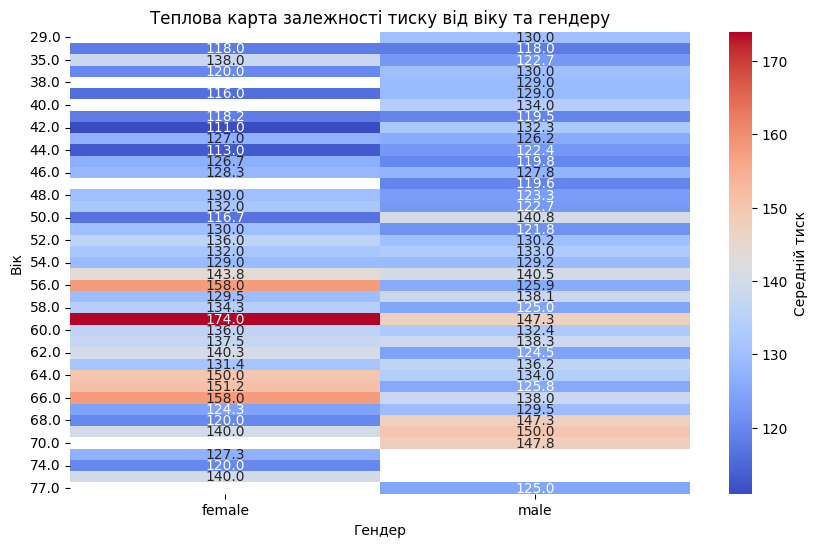

In [40]:
data = df[['age', 'gender', 'trestbps']]

grouped_data = data.groupby(['gender', 'age']).mean().reset_index()
pivot_data = grouped_data.pivot(index='age', columns='gender', values='trestbps')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Середній тиск'})
plt.title('Теплова карта залежності тиску від віку та гендеру')
plt.xlabel('Гендер')
plt.ylabel('Вік')
plt.show()

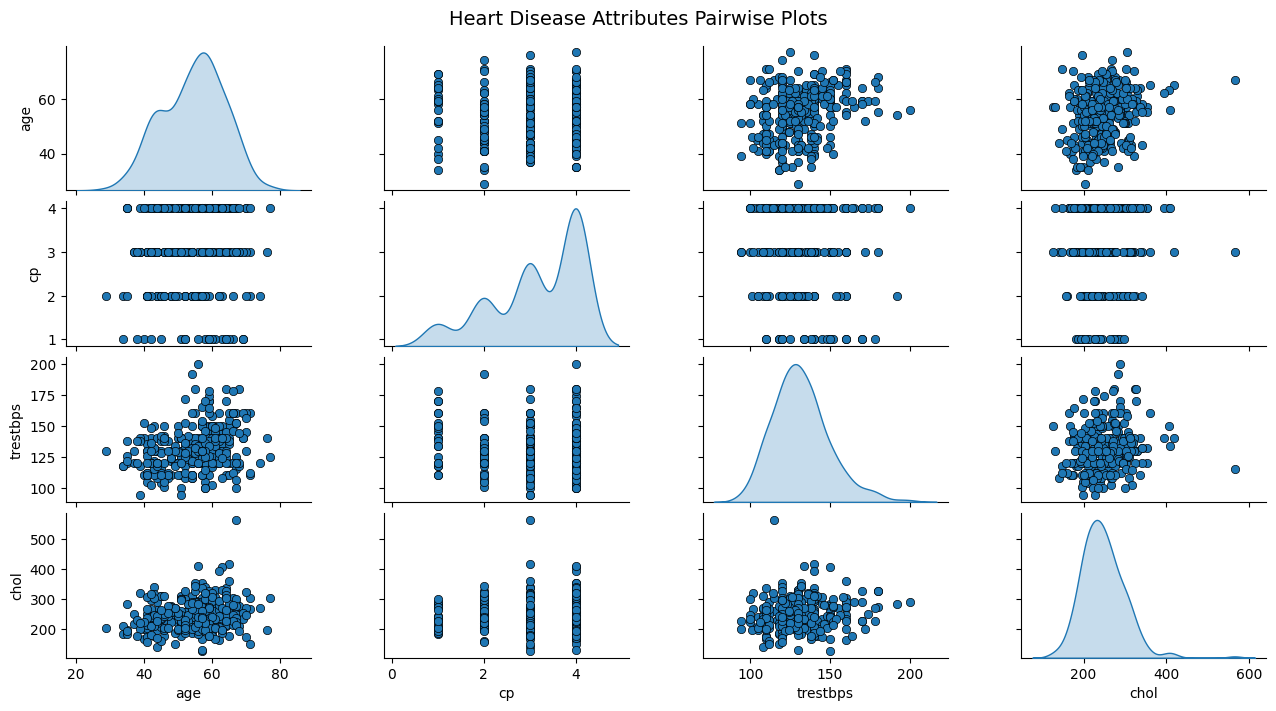

In [41]:
cols = ['age', 'gender', 'cp', 'trestbps', 'chol']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Heart Disease Attributes Pairwise Plots', fontsize=14)

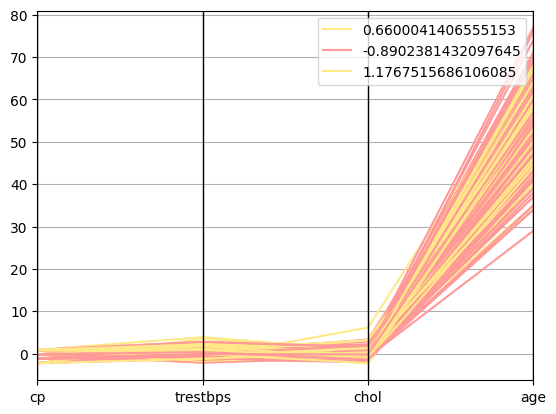

In [42]:
cols = ['thal', 'cp', 'trestbps', 'chol']
subset_df = df[cols]

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)  
final_df = pd.concat([scaled_df, df['age']], axis=1)
final_df.head()

pc = parallel_coordinates(final_df, 'thal', color=('#FFE888', '#FF9999'))
